## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print("Первые 5 строк данных:")
print(data.head())
# print("\nТипы данных в столбцах:") 
# data.info()

X = data.drop('Creditability', axis=1) 
y = data['Creditability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Первые 5 строк данных:
   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                      

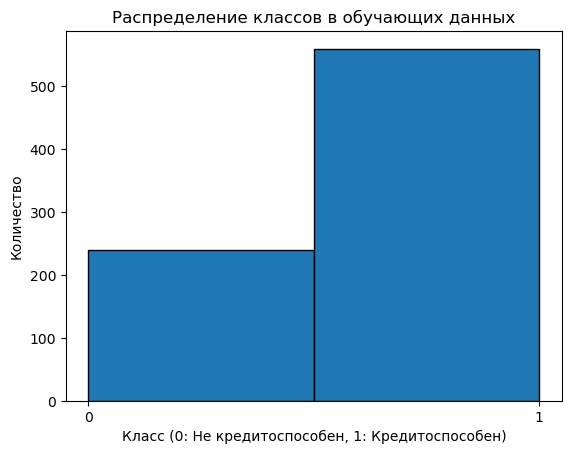

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Класс (0: Не кредитоспособен, 1: Кредитоспособен)')
plt.ylabel('Количество')
plt.title('Распределение классов в обучающих данных')
plt.show()

In [4]:
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nРазмерность данных после обработки:")
print("Обучающая выборка:", X_train_processed.shape)
print("Тестовая выборка:", X_test_processed.shape)


Размерность данных после обработки:
Обучающая выборка: (800, 20)
Тестовая выборка: (200, 20)


In [5]:
logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
logistic_regression_model.fit(X_train_processed, y_train)

decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train_processed, y_train)

knn_model = KNeighborsClassifier(n_neighbors=21, weights='distance', metric='manhattan')
knn_model.fit(X_train_processed, y_train)

y_prob_logistic = logistic_regression_model.predict_proba(X_test_processed)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test_processed)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_processed)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test_processed)
y_pred_decision_tree = decision_tree_model.predict(X_test_processed)
y_pred_knn = knn_model.predict(X_test_processed)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)


print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.4f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}')
print('---')
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.4f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.4f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.4f}')
print('---')
print(f'Precision of Logistic Regression: {precision_logistic:.4f}')
print(f'Precision of Decision Tree: {precision_decision_tree:.4f}')
print(f'Precision of K-Nearest Neighbors: {precision_knn:.4f}')
print('---')
print(f'Recall of Logistic Regression: {recall_logistic:.4f}')
print(f'Recall of Decision Tree: {recall_decision_tree:.4f}')
print(f'Recall of K-Nearest Neighbors: {recall_knn:.4f}')

Accuracy of Logistic Regression: 0.7700
Accuracy of Decision Tree: 0.6900
Accuracy of K-Nearest Neighbors: 0.7800
---
ROC AUC of Logistic Regression: 0.8137
ROC AUC of Decision Tree: 0.6781
ROC AUC of K-Nearest Neighbors: 0.7821
---
Precision of Logistic Regression: 0.8013
Precision of Decision Tree: 0.8305
Precision of K-Nearest Neighbors: 0.7727
---
Recall of Logistic Regression: 0.8929
Recall of Decision Tree: 0.7000
Recall of K-Nearest Neighbors: 0.9714


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели